We have taken data set from kaggle

 #Quick Look at the Raw Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline
np.random.seed(7) # seeding random number generator

csv = "1429_1.csv"
df = pd.read_csv(csv, encoding='latin-1') # Try reading the file with 'latin-1' encoding.
df.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


- We can potentially refine sentiment analysis with the reviews.text column, with the actual rating of reviews.doRecommend column (boolean)
- We can also label each review based on each sentiment
    - title can contain positive/negative information about review

In [4]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

Based on the information above:
- Drop reviews.userCity, reviews.userProvince, reviews.id, and reviews.didPurchase since these values are floats (for exploratory analysis only)
- Not every category have maximum number of values in comparison to total number of values
- reviews.text category has minimum missing data (34659/34660) -> Good news!
- We need to clean up the name column by referencing asins (unique products) since we have 7000 missing values

In [6]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [7]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


**Visualizing the distributions of numerical variables:**

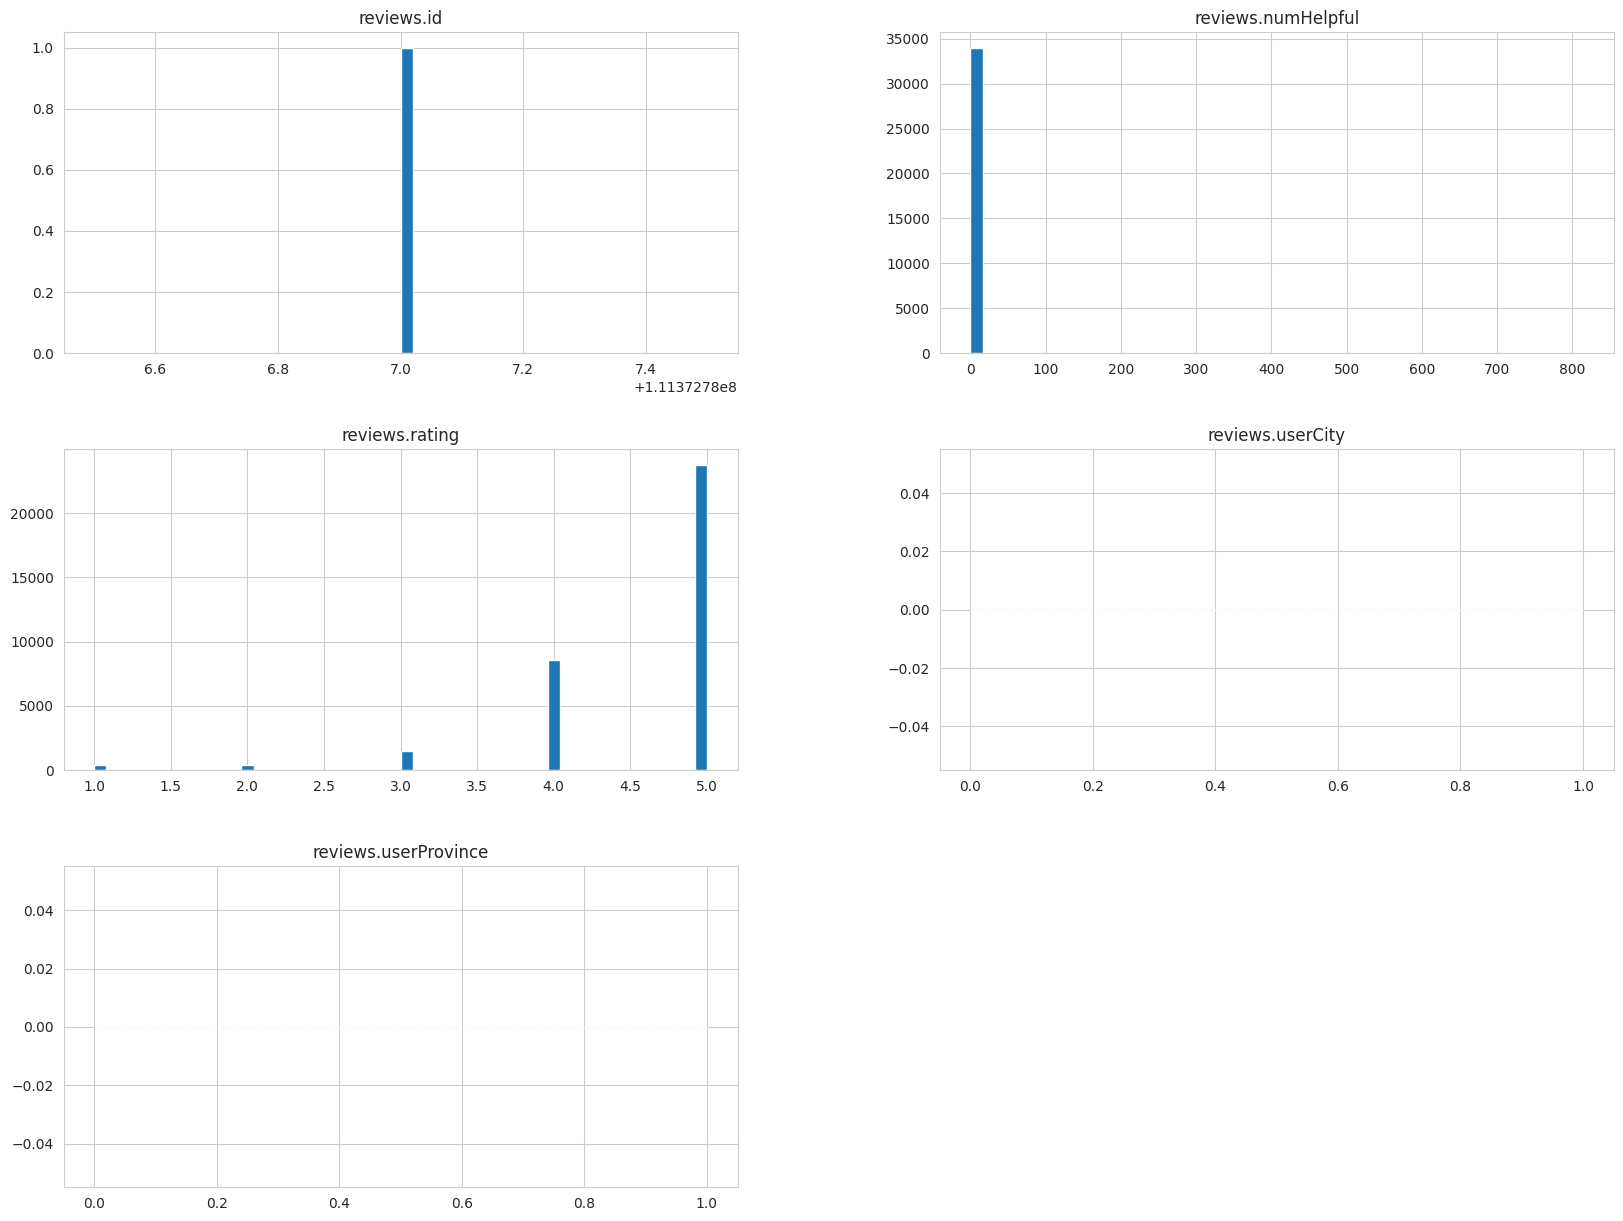

In [8]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

Based on the distributions above:
- reviews.numHelpful: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful
- reviews.rating: Majority of examples were rated highly (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined

# 3 Split into Train/Test

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


In [10]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

**Check to see if train/test sets were stratified proportionately in comparison to raw data.**

In [11]:
len(strat_train)

27701

In [12]:
strat_train["reviews.rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column

,count
reviews.rating,
5.0,0.685174
4.0,0.247031
3.0,0.043500
2.0,0.011696
1.0,0.011588


In [13]:
len(strat_test)

6926

In [14]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

,count
reviews.rating,
5.0,0.689864
4.0,0.244730
3.0,0.042160
1.0,0.011406
2.0,0.011118


# 4 Data Exploration (Training Set)

In [15]:
reviews = strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
4349,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-11-28T00:00:00.000Z,2017-05-21T04:06:08Z,"2017-04-30T00:26:00.000Z,2017-06-07T08:10:00.000Z",...,True,NaN,5.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,we bought this for my 11 year old daughter and...,great for all ages,NaN,NaN,Mark
30776,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2017-01-06T00:00:00.000Z,2017-09-20T05:35:55Z,"2017-08-25T22:21:42.763Z,2017-08-19T09:26:46.1...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,"I have the Roku 4, and new Apple TV, this stre...",Great streaming box,NaN,NaN,Techno


Next, we will explore the following columns:
- asins
- name
- reviews.rating
- reviews.doRecommend
- (reviews.numHelpful - not possible since numHelpful is only between 0-13 as per previous analysis in Raw Data)
- (reviews.text - not possible since text is in long words)

Also, we will explore columns to asins

## 4.1 names / ASINs

In [16]:
len(reviews["name"].unique()), len(reviews["asins"].unique())

(47, 35)

Working hypothesis: there are only 35 products based on the training data ASINs
- One for each ASIN, but more product names (47)
- ASINs are what's important here since we're concerned with products. There's a one to many relationship between ASINs and names
- A single ASIN can have many names due to different vendor listings
- There could also a lot of missing names/more unique names with slight variations in title (ie. 8gb vs 8 gb, NAN for product names)

In [17]:
reviews.groupby("asins")["name"].unique()

,name
asins,
B005PB2T0S,"[Amazon Kindle Lighted Leather Cover,,,\r\nAma..."
B005PB2T2Q,"[Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1..."
B00IOY8XWQ,"[Kindle Paperwhite,,,\r\nKindle Paperwhite,,,,..."
B00IOYAM4I,[Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
"B00L9EPT8O,B01E6AO69U","[Echo (White),,,\r\nEcho (White),,,, Amazon Fi..."
B00LO29KXQ,"[Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include..."
B00LW9XOJM,[nan]
B00OQVZDJM,[Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG,[nan]


<u>Note</u>: there are actually 34 ASINs with one of the product having 2 ASINs

In [18]:
# Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red

In [19]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

,count
name,
"Echo (White),,,\r\nEcho (White),,,",2318
"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",2029
"Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,",259
"Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,",106
"Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,",28
"Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,",7
"Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,\r\nAmazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,",5
"New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,\r\nNew Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,",5
"Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,",5


**Confirmed our hypothesis that each ASIN can have multiple names. Therefore we should only really concern ourselves with which ASINs do well, not the product names.**

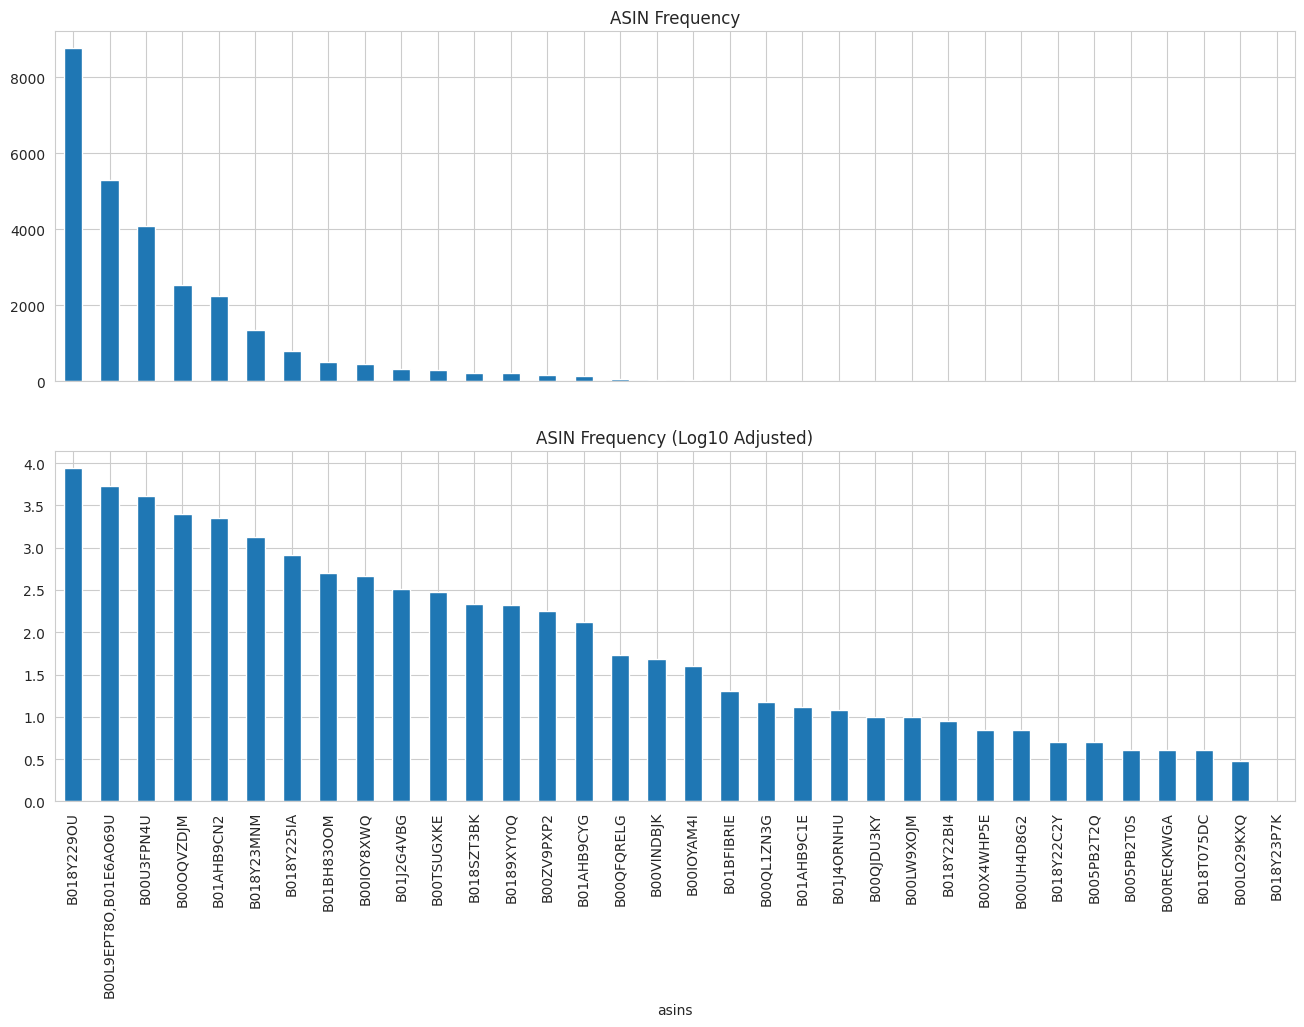

In [20]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)")
plt.show()

- Based on the bar graph for ASINs, we see that certain products have significantly more reviews than other products, which may indicate a higher sale in those specific products
- We also see that the ASINs have a "right tailed" distribution which can also suggest that certain products have higher sales which can correlate to the higher ASINs frequencies in the reviews
- We also took the log of the ASINs to normalize the data, in order display an in-depth picture of each ASINs, and we see that the distribution still follows a "right tailed" distribution

**This answers the first question that certain ASINs (products) have better sales, while other ASINs have lower sale, and in turn dictates which products should be kept or dropped.**

In [21]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.5841072525566435

## 4.2 reviews.rating / ASINs

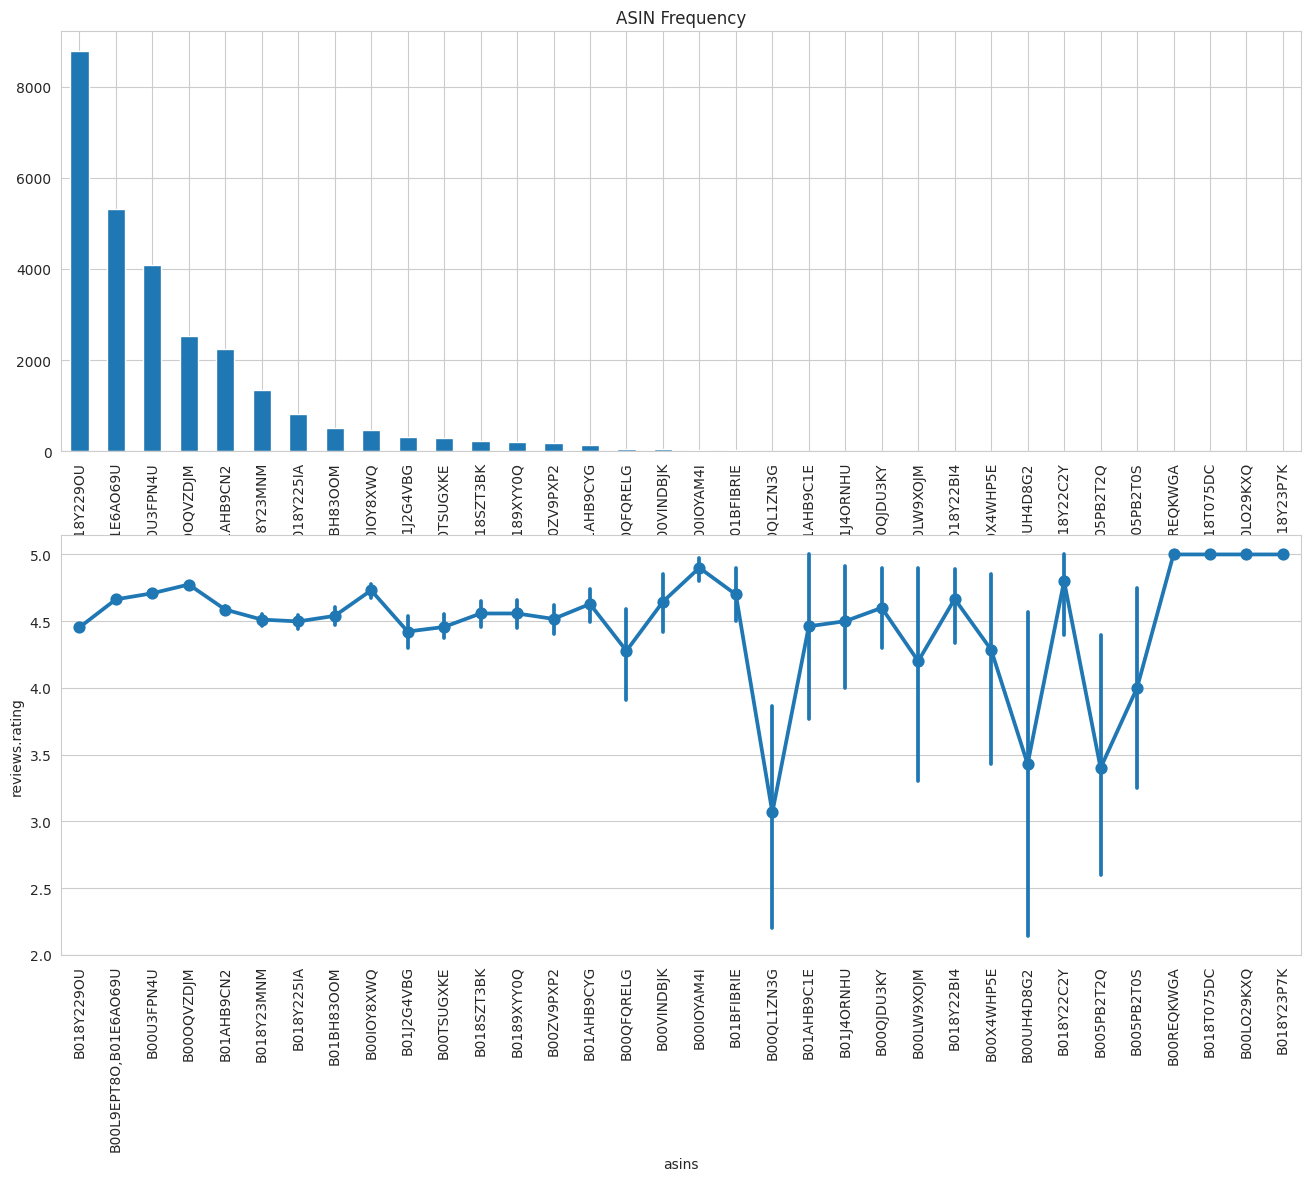

In [22]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

## 4.3 reviews.doRecommend / ASINs

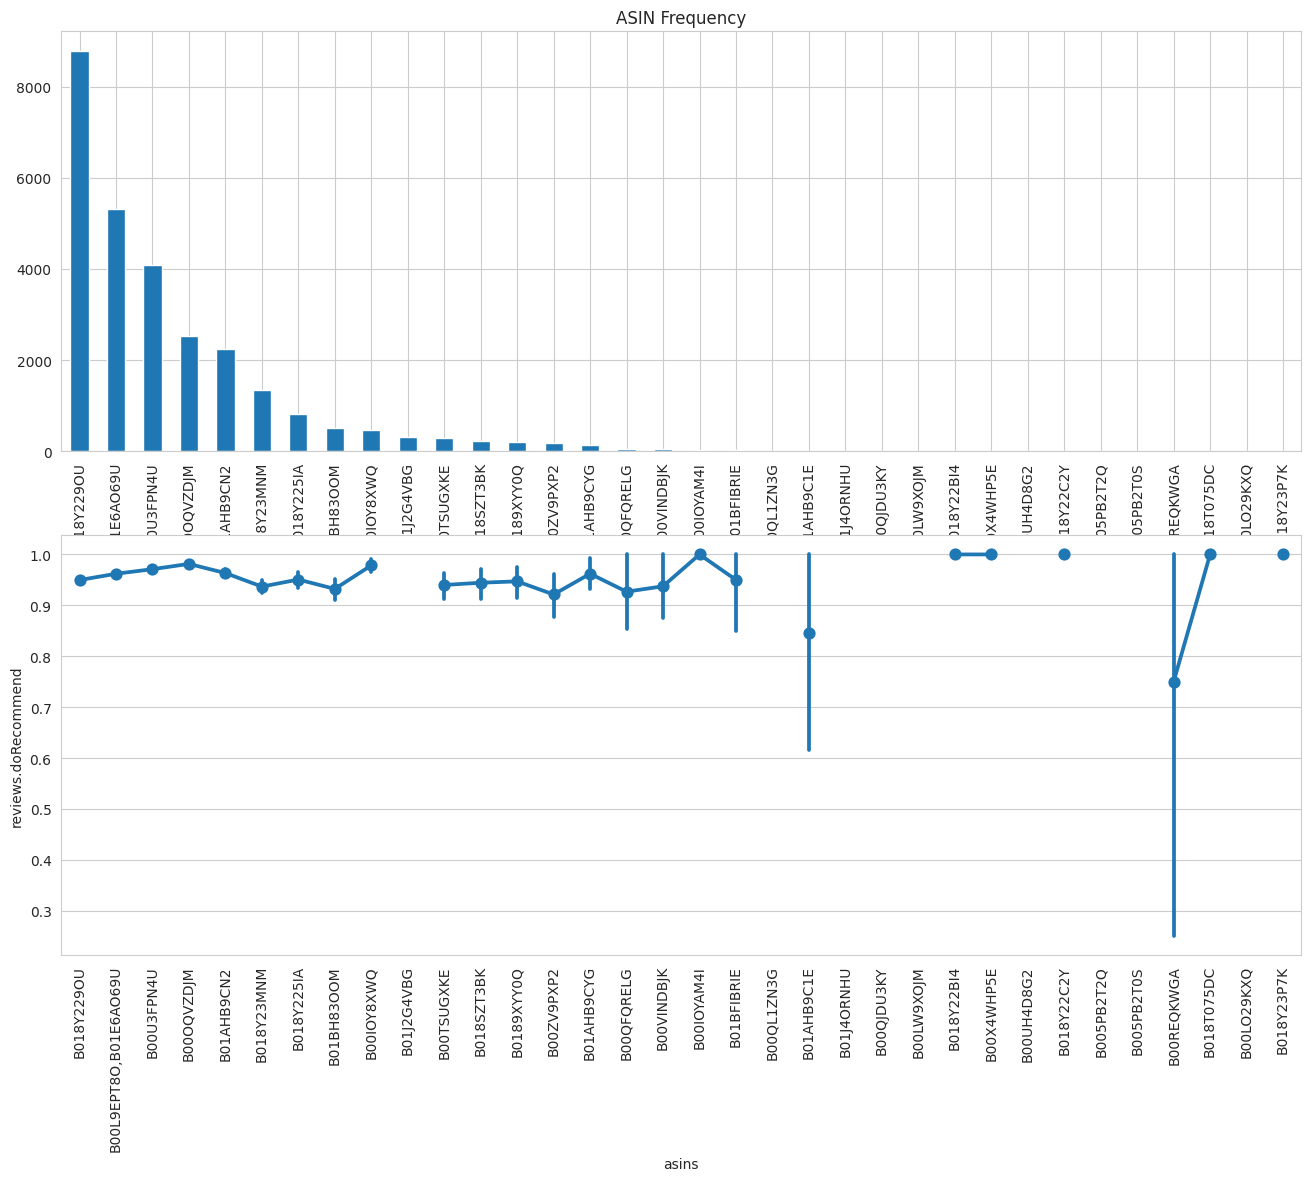

In [23]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

# 5 Correlations

In [25]:
corr_matrix = reviews.corr(numeric_only=True) # Add numeric_only=True to only include numeric columns in the correlation calculation
corr_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.00000,-0.04372,NaN,NaN
reviews.rating,NaN,-0.04372,1.00000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [26]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,count
asins,
B018Y229OU,8772
"B00L9EPT8O,B01E6AO69U",5304
B00U3FPN4U,4076
B00OQVZDJM,2525
B01AHB9CN2,2241


In [27]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.400000
B00IOY8XWQ,4.731183
B00IOYAM4I,4.900000
"B00L9EPT8O,B01E6AO69U",4.663462


In [28]:
table = counts.join(avg_rating)
table.head(30)

,count,reviews.rating
asins,,
B018Y229OU,8772,4.453032
"B00L9EPT8O,B01E6AO69U",5304,4.663462
B00U3FPN4U,4076,4.709028
B00OQVZDJM,2525,4.774653
B01AHB9CN2,2241,4.586792
B018Y23MNM,1346,4.511887
B018Y225IA,811,4.498150
B01BH83OOM,504,4.539683
B00IOY8XWQ,465,4.731183


,count,reviews.rating
count,1.000000,0.099791
reviews.rating,0.099791,1.000000


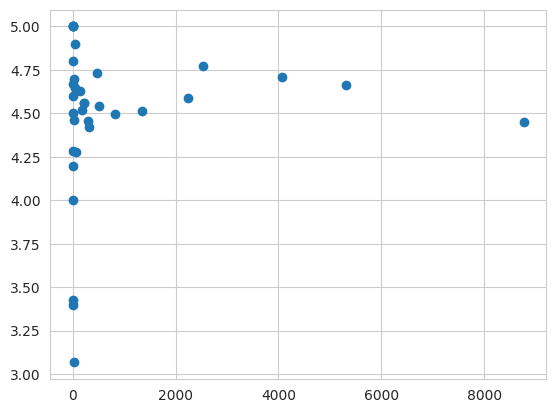

In [30]:
plt.scatter('count', 'reviews.rating', data=table)
table.corr()

From our analysis in data exploration above between ASINs and reviews.rating, we discovered that there are many ASINs with low occurrence that have high variances, as a result we concluded that theses low occurrence ASINs are not significant in our analysis given the low sample size.
<br>
<br>
Similarly in our correlation analysis between ASINs and reviews.rating, we see that there is almost no correlation which is consistent with our findings.

# 6 Sentiment Analysis

Using the features in place, we will build a classifier that can determine a review's sentiment.

## 6.1 Set Target Variable (Sentiments)

Segregate ratings from 1-5 into positive, neutral, and negative.

In [31]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

,Sentiment
4349,Positive
30776,Positive
28775,Neutral
1136,Positive
17803,Positive
7336,Positive
32638,Positive
13995,Positive
6728,Negative
22009,Positive


In [32]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


27,701 training samples and 6926 testing samples.

## 6.2 Extract Features

In [33]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(27701, 12534)

Here we have 27,701 training samples and 12,526 distinct words in our training sample.


Also, with longer documents, we typically see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we will use **TfidfTransformer** to reduce this redundancy:
- Term Frequencies (**Tf**) divides number of occurrences for each word by total number of words
- Term Frequencies times Inverse Document Frequency (**Tfidf**) downscales the weights of each word (assigns less value to unimportant stop words ie. "the", "are", etc)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12534)

## 6.3 Building a Pipeline from the Extracted Features

We will use **Multinominal Naive Bayes** as our Classifier
- Multinominal Niave Bayes is most suitable for word counts where data are typically represented as **word vector counts** (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i
- Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

## 6.4 Test Model

In [36]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9344498989315623

## 6.5 Testing Other Models

**Support Vector Machine Classifier**

In [37]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9393589373375686

Looks like all the models performed very well (>90%), and we will use the **Support Vector Machine Classifier** since it has the highest accuracy level at **93.94%**.
<br>
Now we will fine tune the Support Vector Machine model (Linear_SVC) to avoid any potential over-fitting.

## 6.6 Fine tuning the Support Vector Machine Classifier

- Here we will run a **Grid Search** of the best parameters on a grid of possible values, instead of tweaking the parameters of various components of the chain (ie. use_idf in tfidftransformer)
- We will also run the grid search with LinearSVC classifier pipeline, parameters and cpu core maximization
- Then we will fit the grid search to our training data set
- Next we will use our final classifier (after fine-tuning) to test some arbitrary reviews
- Finally we will test the accuracy of our final classifier (after fine-tuning)

Note that **Support Vector Machines** is very suitable for classification by measuring extreme values between classes, to differentiate the worst case scenarios so that it can classify between Positive, Neutral and Negative correctly.

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
             'tfidf__use_idf': (True, False),
             }
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is not good", # positive
            "The tablet is ok, but it works fine.", # neutral
            "The tablet is not good, does not work very well."] # negative

predicted = gs_clf_LinearSVC_pipe.predict(new_text) # changed from predicted_indices to predicted
# added the following lines to get indices from the predicted array
predicted_indices = []
for i in range(len(predicted)):
    indices = np.where(X_train_targetSentiment == predicted[i])
    predicted_indices.append(indices[0][0])

X_train_targetSentiment.iloc[predicted_indices]

,Sentiment
6728,Negative
28775,Neutral
6728,Negative


In [42]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9408027721628646

**Results:**
- After testing some arbitrary reviews, it seems that our features is performing correctly with Positive, Neutral, Negative results
- We also see that after running the grid search, our Support Vector Machine Classifier has improved to **94.08%** accuracy level

## 6.7 Detailed Performance Analysis of Support Vector Machine Classifier

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         5
    Negative       0.67      0.25      0.36       156
     Neutral       0.47      0.11      0.18       292
    Positive       0.95      1.00      0.97      6473

    accuracy                           0.94      6926
   macro avg       0.52      0.34      0.38      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.9408027721628646


In [44]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.8 MB/s eta 0:00:00


In [58]:
import gradio as gr
l=[]
def se(use):
    l.append(use)
    return X_train_targetSentiment[gs_clf_LinearSVC_pipe.predict(l)]
face = gr.Interface(fn=se,inputs=["text"],outputs=["text"])
face.launch(debug=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://53b37b55c9fe2200c0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
